# Group Members
## Agbalog, Bandivas, Opalla, Reyes, Tamparong

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import shap
import joblib
import warnings

In [2]:
# Load the dataset
pks = pd.read_csv('parkinsons.csv')

### **Data Discussion**

In [3]:
# Display the first few rows of the dataset
pks.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Display basic information about the dataset
pks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
# Statistical summary of the dataset
pks.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
# Dataset's datatypes
pks.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
# Target variable count
pks['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [8]:
# Check for missing values
pks.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [41]:
# Check multicorrelation
pks.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [9]:
# Drop unnecessary column
pks.drop(columns = ['name'], inplace = True)

### **EDA**

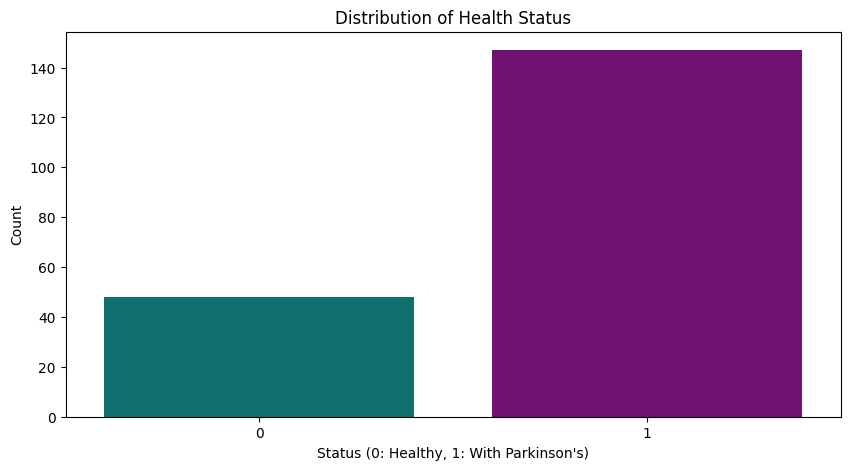

In [10]:
# Distribution of target variable
colors = ['#008080', '#800080']  
plt.figure(figsize = (10, 5))
sns.countplot(x = 'status', data = pks, palette = colors)
plt.title('Distribution of Health Status')
plt.xlabel('Status (0: Healthy, 1: With Parkinson\'s)')
plt.ylabel('Count')
plt.show()

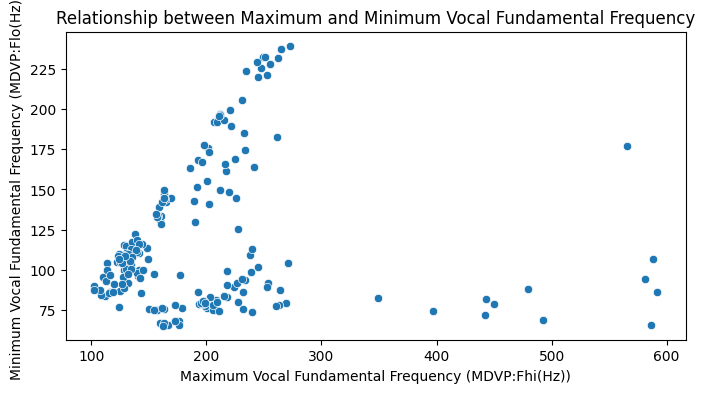

In [11]:
# Relationships between variables
plt.figure(figsize = (8, 4))
sns.scatterplot(x = 'MDVP:Fhi(Hz)', y = 'MDVP:Flo(Hz)', data = pks)
plt.title('Relationship between Maximum and Minimum Vocal Fundamental Frequency')
plt.xlabel('Maximum Vocal Fundamental Frequency (MDVP:Fhi(Hz))')
plt.ylabel('Minimum Vocal Fundamental Frequency (MDVP:Flo(Hz))')
plt.show()

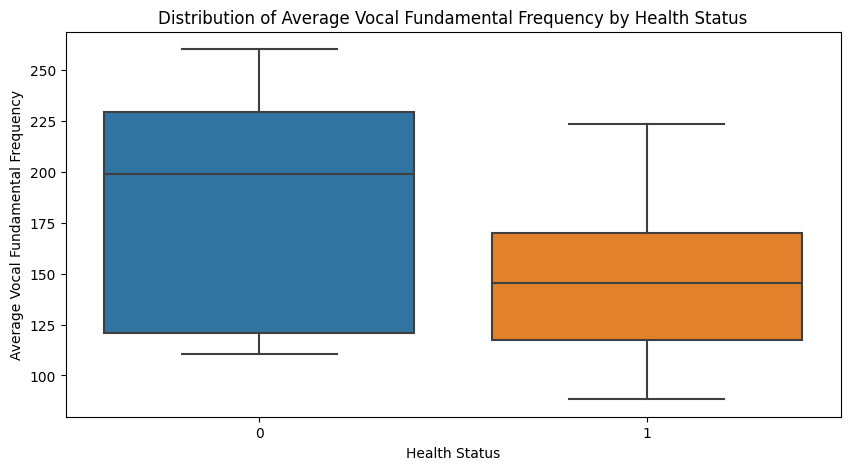

In [12]:
# Distribution Analysis
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'status', y = 'MDVP:Fo(Hz)', data = pks)
plt.title('Distribution of Average Vocal Fundamental Frequency by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Vocal Fundamental Frequency')
plt.show()

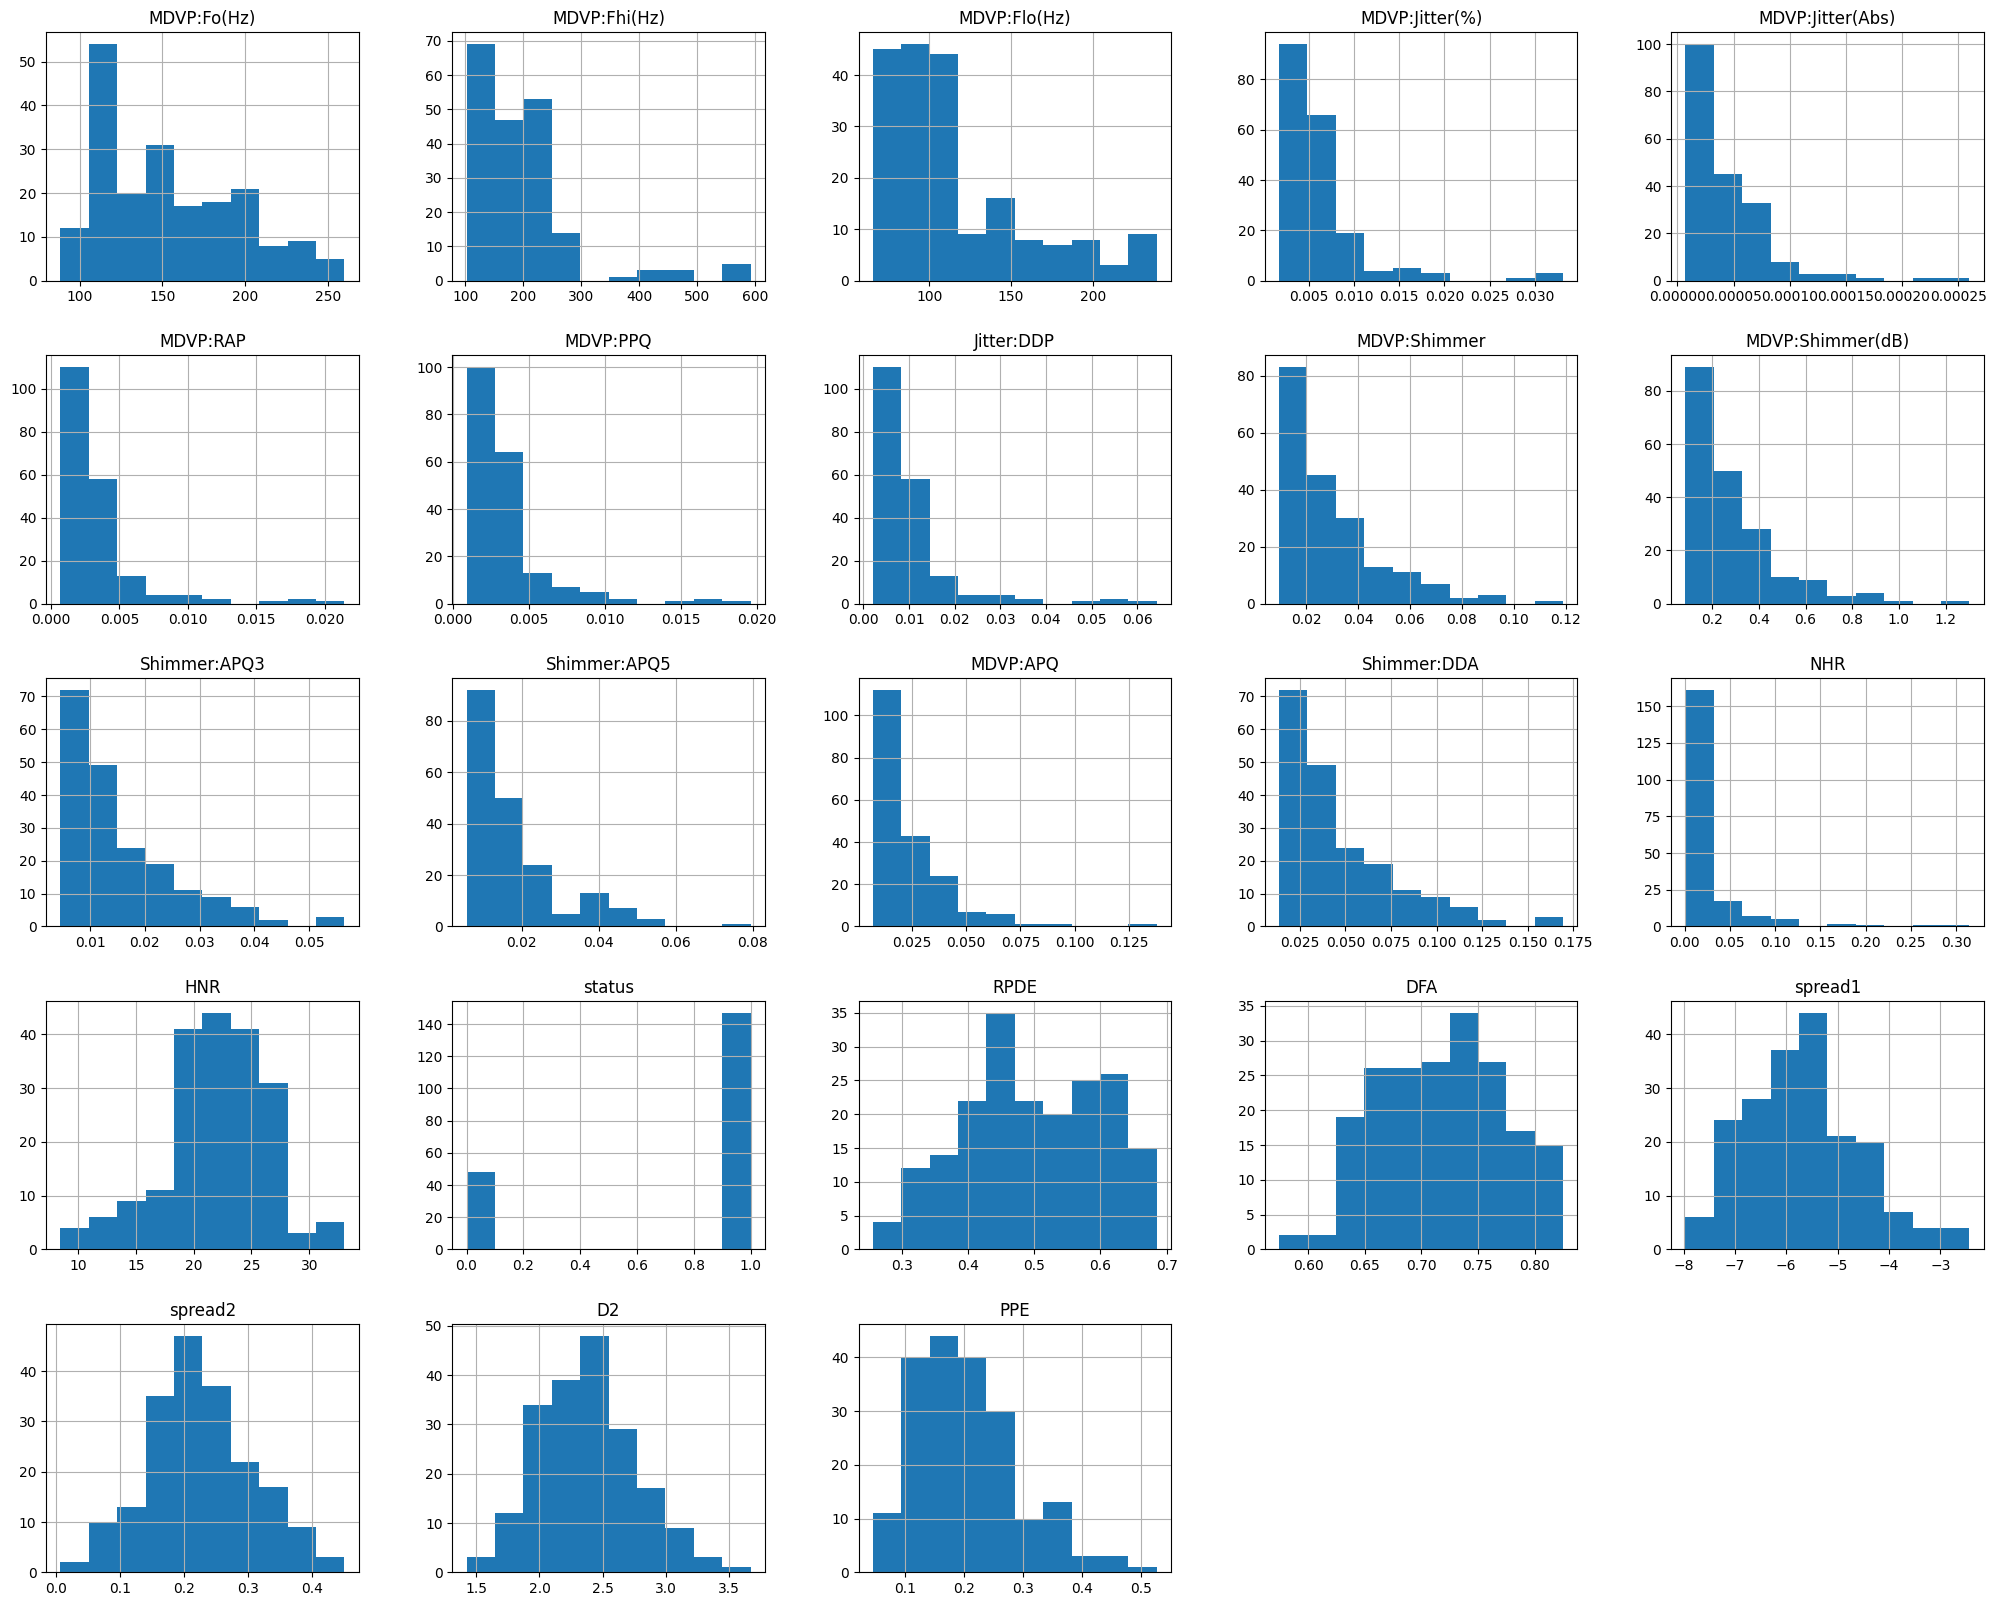

In [40]:
pks.hist(figsize = (25,20));

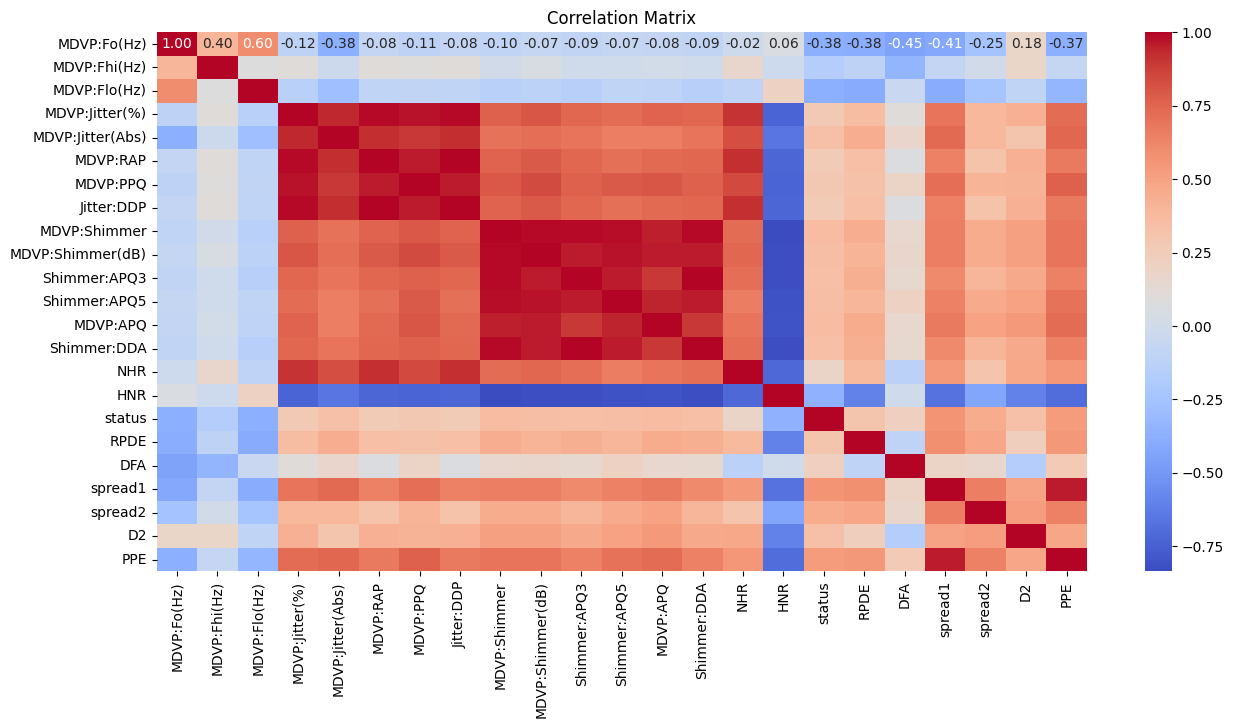

In [13]:
# Correlation matrix
numeric_data = pks.select_dtypes(include = ['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize = (15, 7))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Distributions of numerical variables 
sns.pairplot(pks, hue = 'status', diag_kind = 'kde')
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

### **Data Preprocessing**

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pks.drop('status', axis = 1))

In [15]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [16]:
# Target variable
y = pks['status']

In [17]:
# Feature Selection
selector = SelectKBest(f_classif, k = 10)
X_new = selector.fit_transform(scaled_features, y)
selected_features = pks.drop('status', axis = 1).columns[selector.get_support()]
print("Selected Features: ", selected_features)

Selected Features:  Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ5', 'MDVP:APQ', 'HNR', 'spread1', 'spread2', 'PPE'],
      dtype='object')


In [18]:
# Save the selector
joblib.dump(selector, 'selector.pkl')

['selector.pkl']

In [19]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 42)

In [20]:
# Function to evaluate and collect metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

### **Model Training and Evaluation**

In [21]:
# Logistic Regression with hyperparameter tuning
param_grid_lr = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_lr = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid_lr, cv = 5, scoring = 'accuracy')
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_lr.best_params_)

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [22]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# SVM
svm = SVC(kernel = 'rbf', gamma = 'scale', random_state = 42)
svm.fit(X_train, y_train)

SVC(random_state=42)

In [28]:
# Models and their names
models = {
    "Logistic Regression": best_lr,
    "Random Forest": rf,
    "SVM": svm
}

In [29]:
# Collecting metrics
metrics = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}

In [30]:
# Creating a DataFrame for comparison
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.864407   0.860000  0.977273  0.914894
Random Forest        0.932203   0.934783  0.977273  0.955556
SVM                  0.864407   0.846154  1.000000  0.916667


In [32]:
# Cross-Validation
log_reg_cv = cross_val_score(best_lr, X_new, y, cv = 5)
rf_cv = cross_val_score(rf, X_new, y, cv = 5)
svm_cv = cross_val_score(svm, X_new, y, cv = 5)

print(f"Logistic Regression CV Accuracy: {log_reg_cv.mean()}")
print(f"Random Forest CV Accuracy: {rf_cv.mean()}")
print(f"SVM CV Accuracy: {svm_cv.mean()}")

Logistic Regression CV Accuracy: 0.8205128205128205
Random Forest CV Accuracy: 0.8102564102564103
SVM CV Accuracy: 0.8153846153846154


### **Improved Hyperparameter Tuning**

In [33]:
# Random Forest hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [34]:
grid_rf = GridSearchCV(rf, param_grid_rf, cv = 5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_rf.best_params_}")

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
# Save the best Random Forest model
joblib.dump(best_rf, 'best_rf.pkl')

['best_rf.pkl']

In [36]:
# SVM hyperparameter tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv = 5)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print(f"Best SVM Parameters: {grid_svm.best_params_}")

Best SVM Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [37]:
# Save the best SVM model
joblib.dump(best_svm, 'best_svm.pkl')

['best_svm.pkl']

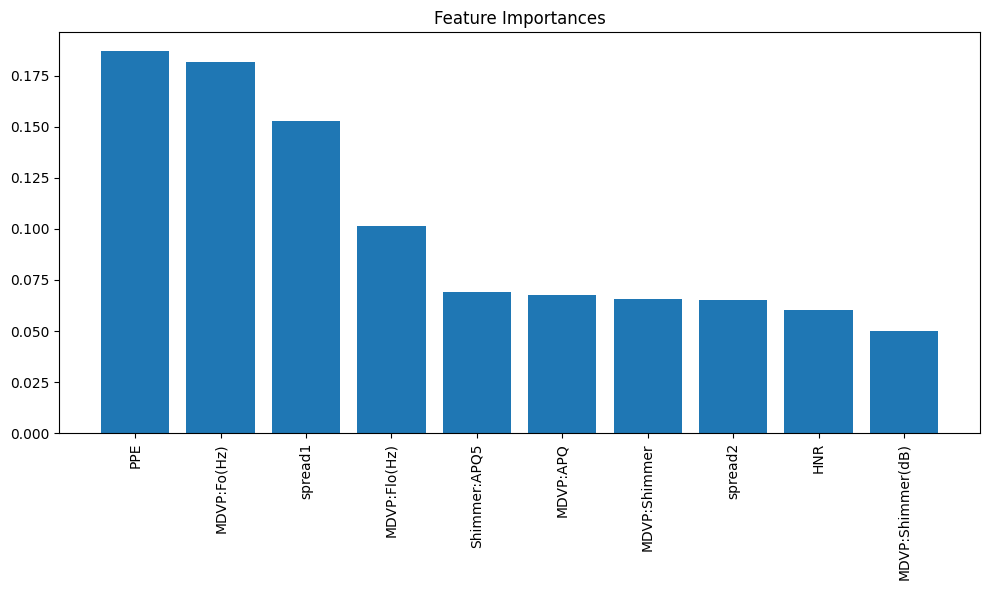

In [38]:
# Feature Importance for Random Forest
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10, 6))
plt.title("Feature Importances")
plt.bar(range(X_new.shape[1]), importances[indices], align = "center")
plt.xticks(range(X_new.shape[1]), selected_features[indices], rotation = 90)
plt.tight_layout()
plt.show()

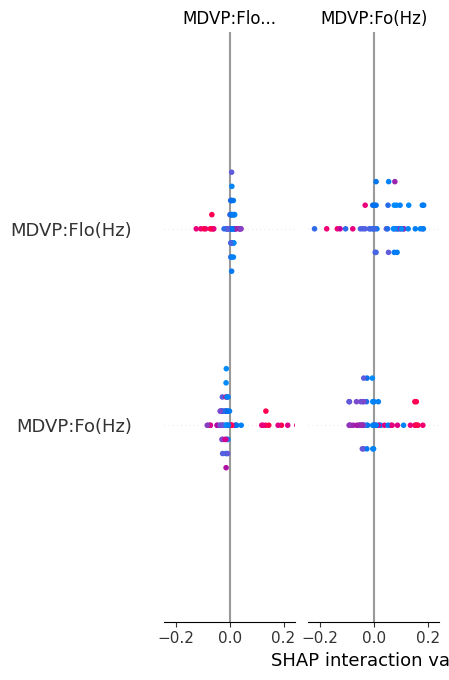

In [39]:
# Model Interpretation with SHAP
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = selected_features)